## News Popularity: Predicting popular news articles. 

In [127]:
pwd

'/Users/pratik'

In [128]:
import pandas as pd

#### Collecting Data

In [129]:
news = pd.read_csv('OnlineNewsPopularity_for_python.csv')

In [130]:
news.head(4)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200


In [131]:
# handle goal attrubte to binary 
popular = news.shares >= 1400 
unpopular = news.shares < 1400 
news.loc[popular,'shares'] = 1 
news.loc[unpopular,'shares'] = 0

In [132]:
news.head(4)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,0


### Decision Tree 

In [133]:
print(news.columns)
news.info()

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

### Exploring and Preparing the Data

In [134]:
target = news['shares']

#### Train, Test data with a aplit of 75% data for training set and 25% data for testing set and seed of 23458. Dropping the "url" column as it is a string type object and just the address of the site, dropping "shares" column from X as "shares" is a response or target variable.

In [135]:
from sklearn.model_selection import train_test_split
y = target
x = news.drop(['shares','url'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23458)


### Design Decision Tree

In [136]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [137]:
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

#### Evaluating the model

In [138]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_predict = model.predict(x_test)
print(confusion_matrix(y_test, y_predict))

[[2513 2050]
 [2098 3250]]


In [139]:

print(accuracy_score(y_test, y_predict)*100)

58.147512864494


#### The results show the accuracy of the model to be 58% for seed of 23458. 

### Random Forest

In [140]:
y = target
x = news.drop(['shares','url'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23458)

In [141]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [142]:
y_predict = clf.predict(x_test)
print(confusion_matrix(y_test, y_predict))

[[2794 1769]
 [1520 3828]]


In [143]:
print(accuracy_score(y_test, y_predict)*100)

66.81465038845728


#### The Results show that using Random Forest the accuracy of predicting popular and unpoularnews based on the model is 67% based on ratio of (True positives and True Negatives) to all predicted observations (TP+FN+FP+TN)

### Important Features

In [144]:
import pandas as pd
feature_importances = pd.DataFrame(clf.feature_importances_, index = news.columns[1:60], columns=['importance']).sort_values('importance', ascending=False) 
feature_importances

,importance
kw_avg_avg,0.040599
kw_max_avg,0.038371
LDA_02,0.033017
timedelta,0.031161
self_reference_avg_sharess,0.029585
LDA_01,0.028522
LDA_04,0.028398
self_reference_min_shares,0.027897
kw_avg_min,0.027684
LDA_00,0.027673


#### We see that the top five most imortant features for the model to predict popular and unpopular news are kw_avg_avg, kw_max_avg, timedelta, LDA_02 and self_reference_min_shares in that order.

#### Finding Correlation

In [145]:
import numpy as np
np.corrcoef(y_test, y_predict)

array([[1.       , 0.3298427],
       [0.3298427, 1.       ]])

#### We see that the correlation between actual and predicted values is 33%

#### Finding RMSE

In [146]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_predict, squared=False)

In [147]:
print(rmse)

0.5760672670057094


#### The results shows that the root mean squared error is 0.57. It appears that the model isa little less effective than the acceptable range as the difference betweent the the actual and predicted test scores or the errors, account for more than 0.50 or 50%.The lower the rmse value the better the model can be assumed to fit the dataset (rmse values lie in range from 0 to 1).


## Part II: Dimensionality Reduction with correlation graph

In [148]:
target = news["shares"]
y = target
x = news.drop(['shares', 'url'], axis = 1)

#### Correlation Graph

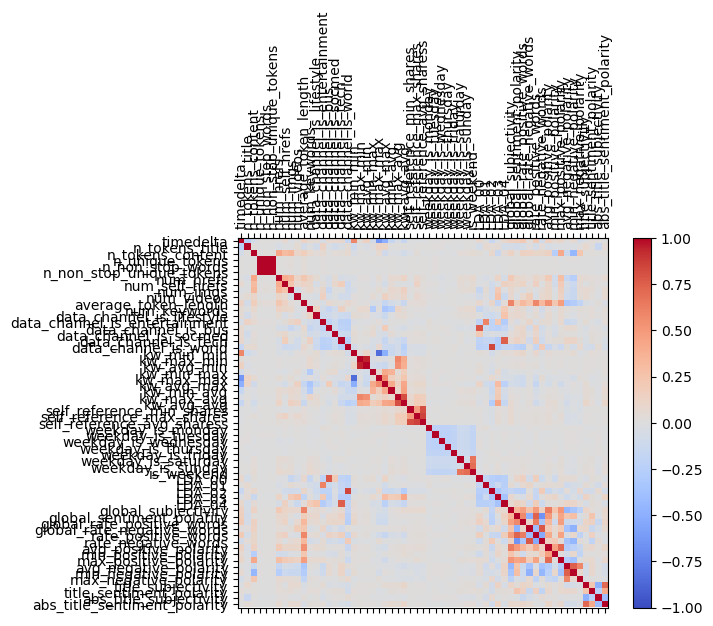

In [149]:
import numpy as np
import matplotlib.pyplot as plt

corr = x.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1) 
fig.colorbar(cax)
ticks = np.arange(0,len(x.columns),1) 
ax.set_xticks(ticks)
plt.xticks(rotation=90) 
ax.set_yticks(ticks) 
ax.set_xticklabels(x.columns) 
ax.set_yticklabels(x.columns) 
plt.show()

In [150]:
corr_matrix = x.corr().abs()
corr_matrix

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
timedelta,1.000000,0.240320,0.062867,0.002866,0.000089,0.003805,0.000832,0.064530,0.027636,0.000936,...,0.126344,0.054772,0.098288,0.000507,0.062175,0.063239,0.015919,0.038711,0.011551,0.002745
n_tokens_title,0.240320,1.000000,0.018160,0.005318,0.004754,0.005420,0.053496,0.014856,0.008858,0.051460,...,0.049619,0.025069,0.021662,0.017096,0.029146,0.011425,0.077245,0.000240,0.146954,0.040550
n_tokens_content,0.062867,0.018160,1.000000,0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,0.135123,0.261493,0.415706,0.130375,0.450603,0.225870,0.004484,0.023358,0.007136,0.013439
n_unique_tokens,0.002866,0.005318,0.004737,1.000000,0.999572,0.999852,0.004352,0.006620,0.018802,0.000597,...,0.000487,0.009193,0.009054,0.001453,0.009902,0.007315,0.004678,0.002333,0.009242,0.004217
n_non_stop_words,0.000089,0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,0.000899,...,0.002285,0.000904,0.002062,0.001372,0.001214,0.000761,0.005389,0.001650,0.008511,0.004391
n_non_stop_unique_tokens,0.003805,0.005420,0.000373,0.999852,0.999532,1.000000,0.004983,0.007584,0.014230,0.000963,...,0.004671,0.008380,0.002245,0.001972,0.004318,0.006708,0.005860,0.002910,0.008572,0.005342
num_hrefs,0.000832,0.053496,0.423065,0.004352,0.005521,0.004983,1.000000,0.396452,0.342633,0.114518,...,0.188236,0.082168,0.286733,0.152146,0.263576,0.054948,0.043950,0.039041,0.009443,0.056525
num_self_hrefs,0.064530,0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,0.098062,0.072648,0.189922,0.058222,0.122071,0.039153,0.011239,0.026224,0.008961,0.006709
num_imgs,0.027636,0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,0.067336,...,0.096446,0.024683,0.155232,0.072500,0.136522,0.042644,0.056815,0.046310,0.013759,0.063307
num_videos,0.000936,0.051460,0.103699,0.000597,0.000899,0.000963,0.114518,0.077458,0.067336,1.000000,...,0.097440,0.010103,0.125659,0.115976,0.138190,0.027251,0.061028,0.021980,0.021982,0.055231


#### Select Upper triangle of correlation matrix

In [151]:
import numpy as np
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape) , k=1).astype(np.bool))

/var/folders/fp/szpx3gxd4ln849f9dbx_lqw00000gn/T/ipykernel_1107/2665990962.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape) , k=1).astype(np.bool))


#### Find index of feature columns with correlation greater than 0.95

In [152]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
xnew = x.drop(to_drop, axis = 1)
xnew

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,min_positive_polarity,avg_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity
0,731,12,219,0.663594,4,2,1,0,4.680365,5,...,0.521617,0.092562,0.045662,0.013699,0.100000,-0.350000,-0.200000,0.500000,-0.187500,0.000000
1,731,9,255,0.604743,3,1,1,0,4.913725,4,...,0.341246,0.148948,0.043137,0.015686,0.033333,-0.118750,-0.100000,0.000000,0.000000,0.500000
2,731,9,211,0.575130,3,1,1,0,4.393365,6,...,0.702222,0.323333,0.056872,0.009479,0.100000,-0.466667,-0.133333,0.000000,0.000000,0.500000
3,731,9,531,0.503788,9,0,1,0,4.404896,7,...,0.429850,0.100705,0.041431,0.020716,0.136364,-0.369697,-0.166667,0.000000,0.000000,0.500000
4,731,13,1072,0.415646,19,19,20,0,4.682836,7,...,0.513502,0.281003,0.074627,0.012127,0.033333,-0.220192,-0.050000,0.454545,0.136364,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8,11,346,0.529052,9,7,1,1,4.523121,8,...,0.482679,0.141964,0.037572,0.014451,0.100000,-0.260000,-0.125000,0.100000,0.000000,0.400000
39640,8,12,328,0.696296,9,7,3,48,4.405488,7,...,0.564374,0.194249,0.039634,0.009146,0.136364,-0.211111,-0.100000,0.300000,1.000000,0.200000
39641,8,10,442,0.516355,24,1,12,1,5.076923,8,...,0.510296,0.024609,0.033937,0.024887,0.136364,-0.356439,-0.166667,0.454545,0.136364,0.045455
39642,8,6,682,0.539493,10,1,1,0,4.975073,5,...,0.358578,-0.008066,0.020528,0.023460,0.062500,-0.205246,-0.012500,0.000000,0.000000,0.500000


#### New Accuracy with new Xnew(after dropping highly correlated variables)

#### Using Xnew(after dropping highly correlated var) for randomising, Splitting, Training model and evaluating

In [153]:
xnew

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,min_positive_polarity,avg_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity
0,731,12,219,0.663594,4,2,1,0,4.680365,5,...,0.521617,0.092562,0.045662,0.013699,0.100000,-0.350000,-0.200000,0.500000,-0.187500,0.000000
1,731,9,255,0.604743,3,1,1,0,4.913725,4,...,0.341246,0.148948,0.043137,0.015686,0.033333,-0.118750,-0.100000,0.000000,0.000000,0.500000
2,731,9,211,0.575130,3,1,1,0,4.393365,6,...,0.702222,0.323333,0.056872,0.009479,0.100000,-0.466667,-0.133333,0.000000,0.000000,0.500000
3,731,9,531,0.503788,9,0,1,0,4.404896,7,...,0.429850,0.100705,0.041431,0.020716,0.136364,-0.369697,-0.166667,0.000000,0.000000,0.500000
4,731,13,1072,0.415646,19,19,20,0,4.682836,7,...,0.513502,0.281003,0.074627,0.012127,0.033333,-0.220192,-0.050000,0.454545,0.136364,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8,11,346,0.529052,9,7,1,1,4.523121,8,...,0.482679,0.141964,0.037572,0.014451,0.100000,-0.260000,-0.125000,0.100000,0.000000,0.400000
39640,8,12,328,0.696296,9,7,3,48,4.405488,7,...,0.564374,0.194249,0.039634,0.009146,0.136364,-0.211111,-0.100000,0.300000,1.000000,0.200000
39641,8,10,442,0.516355,24,1,12,1,5.076923,8,...,0.510296,0.024609,0.033937,0.024887,0.136364,-0.356439,-0.166667,0.454545,0.136364,0.045455
39642,8,6,682,0.539493,10,1,1,0,4.975073,5,...,0.358578,-0.008066,0.020528,0.023460,0.062500,-0.205246,-0.012500,0.000000,0.000000,0.500000


In [154]:
to_drop

['n_non_stop_words',
 'n_non_stop_unique_tokens',
 'kw_avg_min',
 'kw_max_max',
 'kw_avg_avg',
 'self_reference_avg_sharess',
 'is_weekend',
 'LDA_00',
 'LDA_02',
 'LDA_04',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'max_positive_polarity',
 'min_negative_polarity',
 'abs_title_sentiment_polarity']

#### Dropping to_drop columns

In [155]:
news_new = news.drop(['n_non_stop_words',
 'n_non_stop_unique_tokens',
 'kw_avg_min',
 'kw_max_max',
 'kw_avg_avg',
 'self_reference_avg_sharess',
 'is_weekend',
 'LDA_00',
 'LDA_02',
 'LDA_04',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'max_positive_polarity',
 'min_negative_polarity',
 'abs_title_sentiment_polarity'], axis = 1)

#### As above, the to_drop function showed high correlation for 16 columns, which we will remove from our dataset for further analysis. We can see the remainging variables in xnew as below, which we will cond=sider for further analysis

In [156]:
xnew

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,min_positive_polarity,avg_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity
0,731,12,219,0.663594,4,2,1,0,4.680365,5,...,0.521617,0.092562,0.045662,0.013699,0.100000,-0.350000,-0.200000,0.500000,-0.187500,0.000000
1,731,9,255,0.604743,3,1,1,0,4.913725,4,...,0.341246,0.148948,0.043137,0.015686,0.033333,-0.118750,-0.100000,0.000000,0.000000,0.500000
2,731,9,211,0.575130,3,1,1,0,4.393365,6,...,0.702222,0.323333,0.056872,0.009479,0.100000,-0.466667,-0.133333,0.000000,0.000000,0.500000
3,731,9,531,0.503788,9,0,1,0,4.404896,7,...,0.429850,0.100705,0.041431,0.020716,0.136364,-0.369697,-0.166667,0.000000,0.000000,0.500000
4,731,13,1072,0.415646,19,19,20,0,4.682836,7,...,0.513502,0.281003,0.074627,0.012127,0.033333,-0.220192,-0.050000,0.454545,0.136364,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8,11,346,0.529052,9,7,1,1,4.523121,8,...,0.482679,0.141964,0.037572,0.014451,0.100000,-0.260000,-0.125000,0.100000,0.000000,0.400000
39640,8,12,328,0.696296,9,7,3,48,4.405488,7,...,0.564374,0.194249,0.039634,0.009146,0.136364,-0.211111,-0.100000,0.300000,1.000000,0.200000
39641,8,10,442,0.516355,24,1,12,1,5.076923,8,...,0.510296,0.024609,0.033937,0.024887,0.136364,-0.356439,-0.166667,0.454545,0.136364,0.045455
39642,8,6,682,0.539493,10,1,1,0,4.975073,5,...,0.358578,-0.008066,0.020528,0.023460,0.062500,-0.205246,-0.012500,0.000000,0.000000,0.500000


In [157]:
news_new

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,min_positive_polarity,avg_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,4,2,1,0,4.680365,...,0.092562,0.045662,0.013699,0.100000,-0.350000,-0.200000,0.500000,-0.187500,0.000000,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,3,1,1,0,4.913725,...,0.148948,0.043137,0.015686,0.033333,-0.118750,-0.100000,0.000000,0.000000,0.500000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,3,1,1,0,4.393365,...,0.323333,0.056872,0.009479,0.100000,-0.466667,-0.133333,0.000000,0.000000,0.500000,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,9,0,1,0,4.404896,...,0.100705,0.041431,0.020716,0.136364,-0.369697,-0.166667,0.000000,0.000000,0.500000,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,19,19,20,0,4.682836,...,0.281003,0.074627,0.012127,0.033333,-0.220192,-0.050000,0.454545,0.136364,0.045455,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8,11,346,0.529052,9,7,1,1,4.523121,...,0.141964,0.037572,0.014451,0.100000,-0.260000,-0.125000,0.100000,0.000000,0.400000,1
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8,12,328,0.696296,9,7,3,48,4.405488,...,0.194249,0.039634,0.009146,0.136364,-0.211111,-0.100000,0.300000,1.000000,0.200000,1
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8,10,442,0.516355,24,1,12,1,5.076923,...,0.024609,0.033937,0.024887,0.136364,-0.356439,-0.166667,0.454545,0.136364,0.045455,1
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8,6,682,0.539493,10,1,1,0,4.975073,...,-0.008066,0.020528,0.023460,0.062500,-0.205246,-0.012500,0.000000,0.000000,0.500000,0


### Decision Tree Model: (After dropping the correlated variables)

##### (Note: It is not necessary to normalize or standardize the data for Decision Tree and Random Forest models)

In [158]:
y = target
x = xnew
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23458)

In [159]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(confusion_matrix(y_test, y_predict))

[[2503 2060]
 [2151 3197]]


In [160]:
print(accuracy_score(y_test, y_predict)*100)

57.51185551407527


### Random Forest Model: (After dropping the correlated variables)

In [161]:
y = target
x = xnew
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23458)

In [162]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(confusion_matrix(y_test, y_predict))

[[2791 1772]
 [1509 3839]]


In [163]:
print(accuracy_score(y_test, y_predict)*100)

66.89536878216124


#### It is observed that there isn't much difference in the accuracies of Decision Tree and Random Forest models after dropping the correlated variables.

#### Normalizing the data(Normalization: Use MinMaxScaler from sklearn, Standardization: Use StandardScaler from sklearn)

In [164]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(xnew)
print(scaled)

[[1.         0.47619048 0.02584376 ... 0.5        0.40625    0.        ]
 [1.         0.33333333 0.03009205 ... 0.         0.5        1.        ]
 [1.         0.33333333 0.02489969 ... 0.         0.5        1.        ]
 ...
 [0.         0.38095238 0.05215955 ... 0.45454545 0.56818182 0.09090909]
 [0.         0.19047619 0.08048147 ... 0.         0.5        1.        ]
 [0.         0.38095238 0.01852726 ... 0.33333333 0.625      0.33333333]]


#### Training(90) and Test(10) Split): (Note : Use Normalized x (xnew) when splitting data)

In [165]:
y = target
x = scaled
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 1234)
y_train

24329    1
11705    0
1995     1
22132    1
24562    1
        ..
32399    0
17048    1
23924    0
34086    0
27439    0
Name: shares, Length: 35679, dtype: int64

In [166]:
x_train.shape

(35679, 43)

In [167]:
x_test.shape

(3965, 43)

#### Train the model, Use Linear Separator to design the model

#### Designing the model

In [168]:
from sklearn import svm
clf = svm.SVC(kernel = "linear")
clf

SVC(kernel='linear')

In [169]:
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

In [170]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test, y_predict))

[[ 940  927]
 [ 618 1480]]


In [171]:
accuracy_score(y_test, y_predict)*100

61.03404791929382

#### Improving the model by changing the kernels

#### Using the "rbf" kernel

In [172]:
clf = svm.SVC(kernel='rbf', gamma =0.3) 
#clf = svm.LinearSVC(C=1)
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test) 
confusion_matrix(y_test, y_predict)

array([[1084,  783],
       [ 617, 1481]])

In [173]:
accuracy_score(y_test, y_predict)*100 

64.69104665825978

#### Using the 'poly kernel' kernel

In [174]:
clf = svm.SVC(kernel='poly', degree=8) 
#clf = svm.LinearSVC(C=1) 
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test)
print(confusion_matrix(y_test, y_predict))

[[1217  650]
 [ 754 1344]]


In [59]:
print(accuracy_score(y_test, y_predict)*100)

64.59016393442623


#### The highly correlated 16 variabled were removed from before normalizing the data.The input varables(x variables) were normalized using the MinMaxScaler from sklearn. The data was further split into Training (90%) and Test Data set(10%). The LinearSVC Kernel model showed an accuracy of 61.03%. The accuracy increased to 64.69%  when using the 'rbf' kernel with gamma =0.3. The Accuracy was seen to be 64.59% by changing the Kernel to 'poly' kernel with degrees = 8.



## Part III: Dimensionality Reduction using Principal Component Analysis

In [175]:
import pandas as pd
news = pd.read_csv('OnlineNewsPopularity_for_python.csv')
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [176]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  int64  
 2   n_tokens_title                 39644 non-null  int64  
 3   n_tokens_content               39644 non-null  int64  
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  int64  
 8   num_self_hrefs                 39644 non-null  int64  
 9   num_imgs                       39644 non-null  int64  
 10  num_videos                     39644 non-null  int64  
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [177]:
# handle goal attrubte to binary 
popular = news.shares >= 1400 
unpopular = news.shares < 1400 
news.loc[popular,'shares'] = 1 
news.loc[unpopular,'shares'] = 0

In [178]:
target = news["shares"]
y = target

#### Normalizing the data

In [179]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(news.drop(columns = ["shares", "url"], axis =1))
scaled

array([[ 1.75788035,  0.75744723, -0.69521045, ..., -0.97543219,
        -1.81071884,  0.13891975],
       [ 1.75788035, -0.66165665, -0.61879381, ..., -0.26907618,
         0.83774863, -0.68965812],
       [ 1.75788035, -0.66165665, -0.71219192, ..., -0.26907618,
         0.83774863, -0.68965812],
       ...,
       [-1.61808342, -0.18862202, -0.2218518 , ...,  0.24463728,
        -1.56994907, -0.08705603],
       [-1.61808342, -2.08076053,  0.28759248, ..., -0.26907618,
         0.83774863, -0.68965812],
       [-1.61808342, -0.18862202, -0.82681689, ...,  0.67273184,
        -0.92789635,  0.41511238]])

#### Implementing PCA with selecting 30 components from all initial 58 Variables.

In [180]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
PC = pca.fit(scaled)
PC.components_

array([[-0.16132739,  0.0581139 , -0.13404156, ..., -0.08046848,
         0.03406751, -0.07174961],
       [-0.19286504,  0.07672684,  0.09800518, ..., -0.04403546,
        -0.03249026,  0.07886985],
       [-0.06891273,  0.01090471, -0.13706484, ...,  0.12710808,
        -0.0733436 ,  0.09586703],
       ...,
       [ 0.00838535, -0.03247174,  0.10835193, ..., -0.22710656,
         0.11732152,  0.11457629],
       [ 0.09999982, -0.0683428 , -0.0681115 , ...,  0.21921158,
        -0.23191139, -0.17044049],
       [-0.01377077,  0.15246142, -0.19444994, ...,  0.01398225,
         0.58131374,  0.27219535]])

#### Variance in components

In [181]:
PC.explained_variance_ratio_

array([0.08275377, 0.06985565, 0.06110151, 0.0508775 , 0.0476545 ,
       0.04397503, 0.04309095, 0.03886672, 0.03606727, 0.03525317,
       0.03393574, 0.03195266, 0.02806568, 0.02339546, 0.02313932,
       0.02094132, 0.02082307, 0.02053415, 0.02022003, 0.019877  ,
       0.01914186, 0.01839665, 0.01771758, 0.01543414, 0.01476358,
       0.01378672, 0.01224695, 0.0114735 , 0.01112032, 0.01035154])

#### As we see above the 30 principal components together explain a little over 80 % of the variance. So we will select all thirty Principal Components

In [182]:
new_feats = pca.fit_transform(scaled)
new_feats

array([[-1.35785685, -1.88425763, -1.97397881, ..., -0.11094511,
         0.27523182, -0.27541342],
       [ 0.1963981 , -4.30538314, -1.13590248, ..., -0.94971978,
         0.57584067,  0.42601707],
       [-3.7311749 , -3.49820523, -1.735055  , ...,  0.39372428,
        -0.3908806 ,  0.49556552],
       ...,
       [ 0.47529804,  2.6445924 ,  0.06452597, ..., -0.89615935,
         0.70758756, -1.12919284],
       [ 3.57385922,  0.24496315, -3.16682215, ..., -0.84042448,
         0.53751021,  0.10111069],
       [ 0.78548101,  0.61241234,  2.30935024, ...,  0.298666  ,
         1.35605723, -0.161829  ]])

#### Creating dataframe with the new features as the 30 principal components from above.

In [183]:
new_data = pd.DataFrame(new_feats, columns = ["PCA1", "PCA2", "PCA3", "PC4", "PC5", "PC6", "PC7", "PC8", "PCA9", "PCA10", "PCA11", "PCA12", "PCA13", "PCA14", "PCA15", "PCA16", "PCA17", "PCA18", "PCA19", "PCA20", "PCA21","PCA22", "PCA23", "PCA24", "PCA25", "PCA26", "PCA27", "PCA28", "PCA29", "PCA30"])

In [184]:
new_data.head()

,PCA1,PCA2,PCA3,PC4,PC5,PC6,PC7,PC8,PCA9,PCA10,...,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30
0,-1.357857,-1.884258,-1.973979,-0.000726,0.431248,-3.606503,1.421048,-1.418715,0.462156,0.248838,...,-0.223601,-0.134402,-0.178667,1.066302,-0.285895,0.753752,-1.240722,-0.110945,0.275232,-0.275413
1,0.196398,-4.305383,-1.135902,0.082758,-0.351744,-1.565965,3.365590,0.305649,1.896648,-1.307915,...,-0.156436,-0.143013,-0.254537,-0.368176,-0.241165,-0.217157,-0.564514,-0.949720,0.575841,0.426017
2,-3.731175,-3.498205,-1.735055,-0.078569,-0.386974,-0.860576,2.504444,-0.273746,-0.266942,-0.607683,...,-0.477373,-0.595017,-0.570579,-0.458763,-0.654302,-1.151017,-0.640536,0.393724,-0.390881,0.495566
3,-0.670099,-1.695278,-3.436231,-0.106110,1.187241,-2.169244,1.392527,-1.008122,-0.530892,-0.921217,...,-0.884878,0.188323,-0.149082,-0.564693,0.264014,-0.648567,-0.161884,0.522143,0.211986,0.069116
4,-4.169513,-3.718399,-1.441031,-0.131872,0.376862,0.343934,-2.743607,-1.432815,0.532606,-0.890995,...,1.227138,-0.867398,-0.200278,1.463762,-0.548412,0.958151,-0.131704,-0.697224,0.755375,0.688079


### SVM using "rbf" kernel after dimensionality reduction

In [185]:
clf = svm.SVC(kernel='rbf', gamma =0.3) 
#clf = svm.LinearSVC(C=1)
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test) 
confusion_matrix(y_test, y_predict)

array([[1084,  783],
       [ 617, 1481]])

In [186]:
print(accuracy_score(y_test, y_predict)*100)

64.69104665825978


### Sunsupervised model: Using Clustering to determine the best value of K using K-means .


At k=  1 The percentage of change in SSE is  88.07631058253925 %
At k=  2 The percentage of change in SSE is  6.1770128975934755 %
At k=  3 The percentage of change in SSE is  5.352399147817898 %
At k=  4 The percentage of change in SSE is  5.196874067232386 %
At k=  5 The percentage of change in SSE is  5.907706464446229 %
At k=  6 The percentage of change in SSE is  5.588287251806153 %
At k=  7 The percentage of change in SSE is  3.213208487607857 %
At k=  8 The percentage of change in SSE is  4.181117909254028 %
At k=  9 The percentage of change in SSE is  3.8599610578537344 %
At k=  10 The percentage of change in SSE is  2.8623620777938474 %
At k=  11 The percentage of change in SSE is  2.5649047197786743 %
At k=  12 The percentage of change in SSE is  2.802892920114828 %
At k=  13 The percentage of change in SSE is  2.5372429036207804 %
At k=  14 The percentage of change in SSE is  2.255100568286224 %
At k=  15 The percentage of change in SSE is  3.447060012527133 %
At k=  16 The 

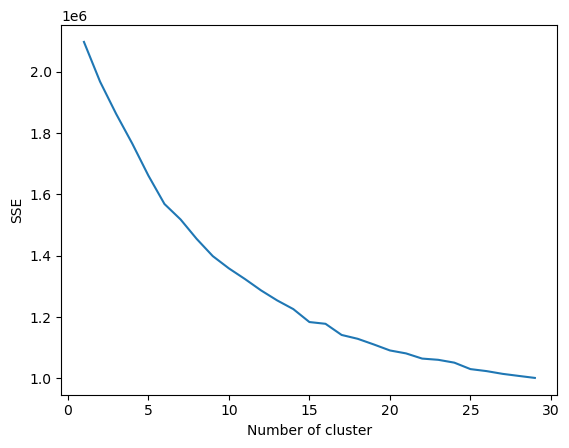

In [187]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
last_sse = 17592402.70373319
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, random_state=12345, n_init = 25).fit(new_data)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    change_per = (last_sse-kmeans.inertia_)/last_sse*100
    print ('At k= ',k,'The percentage of change in SSE is ',change_per,'%') 
    last_sse = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values())) 
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### From the graph it looks like values of k from 5 to 9 can be a good range.

### Using KNN classifier which is a Supervised Learning Algorithm

### Using k=2, Randomizing the data with seed 12345

In [188]:
import random
target = news["shares"]
random.seed(12345)
indx = random.sample(range(0, 1000), 1000) 
new_data_rand = new_data.iloc[indx] 
target_rand = target.iloc[indx]

### Splitting into 80% training data and 20% testing data

In [189]:
from sklearn.model_selection import train_test_split

y = target_rand
x = new_data_rand

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12345)

#### Using KNN algorithm for Classification with k=2

In [190]:
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=2) 
model = neigh.fit(x, y)
y_predict = model.predict(x_test)

/Users/pratik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [191]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_predict)*100)

[[9300    0]
 [4100 6600]]


In [192]:
print(accuracy_score(y_test, y_predict)*100)

79.5


### Using K-value of 5

In [193]:
import random
target = news["shares"]
random.seed(12345)
indx = random.sample(range(0, 1000), 1000) 
new_data_rand = new_data.iloc[indx] 
target_rand = target.iloc[indx]


y = target_rand
x = new_data_rand

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12345)


neigh = KNeighborsClassifier(n_neighbors=5) 
model = neigh.fit(x, y)

y_predict = model.predict(x_test)

/Users/pratik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [194]:
print(confusion_matrix(y_test, y_predict)*100)
print(accuracy_score(y_test, y_predict)*100)

[[7200 2100]
 [2800 7900]]
75.5


### Using k-value of 8

In [195]:
import random
target = news["shares"]
random.seed(12345)
indx = random.sample(range(0, 1000), 1000) 
new_data_rand = new_data.iloc[indx] 
target_rand = target.iloc[indx]


y = target_rand
x = new_data_rand

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12345)


neigh = KNeighborsClassifier(n_neighbors=8) 
model = neigh.fit(x, y)

y_predict = model.predict(x_test)

print(confusion_matrix(y_test, y_predict)*100)
print(accuracy_score(y_test, y_predict)*100)

[[7600 1700]
 [4700 6000]]
68.0


/Users/pratik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Using K-20

In [196]:
import random
target = news["shares"]
random.seed(12345)
indx = random.sample(range(0, 1000), 1000) 
new_data_rand = new_data.iloc[indx] 
target_rand = target.iloc[indx]


y = target_rand
x = new_data_rand

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12345)


neigh = KNeighborsClassifier(n_neighbors=21) 
model = neigh.fit(x, y)

y_predict = model.predict(x_test)

print(confusion_matrix(y_test, y_predict)*100)
print(accuracy_score(y_test, y_predict)*100)

[[6400 2900]
 [4200 6500]]
64.5


/Users/pratik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### As seen above the accuracy for k=2 is 80%, K=5 is 75.5%, k=8 is 69.5% and k=21 is 63.5%. However, from the graph generated above, it looks like k=8 is a better value as the sse is small compared to K=2 and k=5. A slight elbow can be seen from the graph as seen from k= 5 to k=8 with a good percentage change in sse. The percentage in sse after k=9 is very less comparatively. I would like to use value of K= 8.

### Conclusion:

#### Amongst all the algorithms used, the KNN Classifier algorithm after Dimensionality Reduction gave us the maximum accuracy for prediciting the Popular news articles.